<a href="https://colab.research.google.com/github/v2047/Data-Analysis/blob/main/AssignmentMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <h1>Vanshika Tomar</h1>
  <h2>Roll No:23154090090</h2>
</div>

In [ ]:
# importing Required Libararies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



**Importing the data**


In [ ]:
data = '/content/drive/MyDrive/iris1.csv'
df_iris = pd.read_csv(data)
df_iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Checking the no of rows and columns
df_iris.shape

(150, 5)

In [ ]:
# Checking the all the columns name
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# checking the types of data and non null values
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# To display number of samples on each class
df_iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In this dataset , we have three types of species of the flowers(setosa,versicolor, virginica).Each species have 50 samples and we can say this dataset is balanced dataset.


**Handle missing values**

In [ ]:
 # checking the missing values counts
df_iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


There is no missing value in the data.

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


# Exploratory Data Analysis (EDA)

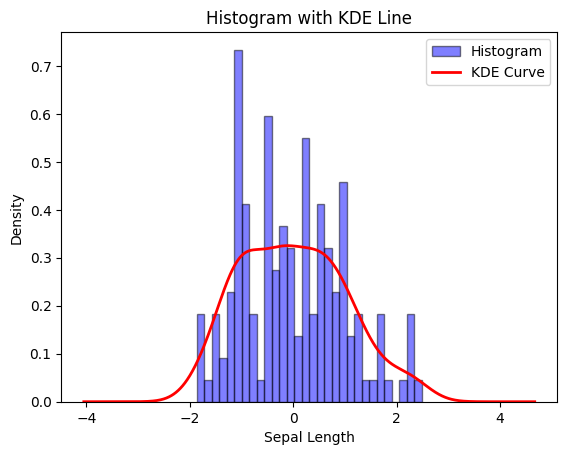

In [ ]:
df_iris['sepal_length'].hist(bins=30, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histogram')

# Add a KDE curve using pandas
df_iris['sepal_length'].plot(kind='kde', color='red', linewidth=2, label='KDE Curve')
# Add labels and legend
plt.title('Histogram with KDE Line')
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
skewness = df_iris['sepal_length'].skew()
print("Skewness:", skewness)

Skewness: 0.3149109566369739


**Sepal Length Histogram Conculsion :**

The data seems to be concentrated between 5 and 7 (most common range).

The distribution appears to be slightly right-skewed (a longer tail toward larger values).

The dataset shows a bell-shaped curve, indicating the data is close to a normal distribution but not perfectly symmetrical.

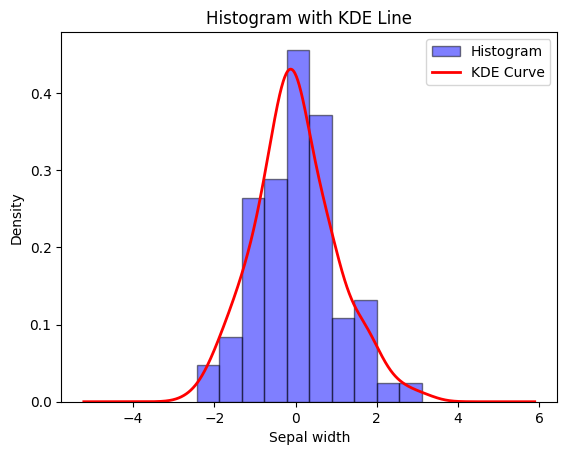

In [ ]:
df_iris['sepal_width'].hist(density=True, alpha=0.5, color='blue', edgecolor='black', label='Histogram')

# Add a KDE curve using pandas
df_iris['sepal_width'].plot(kind='kde', color='red', linewidth=2, label='KDE Curve')
# Add labels and legend
plt.title('Histogram with KDE Line')
plt.xlabel('Sepal width')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [ ]:
skewness = df_iris['sepal_width'].skew()
print("Skewness:", skewness)

Skewness: 0.3340526621720878


**Sepal Width Observation :**

The data seems to be concentrated between 2 and 4.

The distribution appears to be slightly right-skewed (a longer tail toward larger values).

The dataset shows a bell-shaped curve, indicating the data is close to a normal distribution.

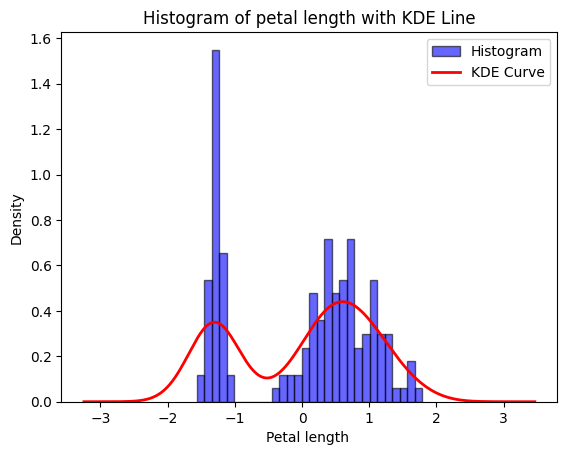

In [ ]:
# Plot the histogram
df_iris['petal_length'].hist(bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Histogram')

# Add a KDE curve using pandas
df_iris['petal_length'].plot(kind='kde', color='red', linewidth=2, label='KDE Curve')

# Add labels and legend
plt.title('Histogram of petal length with KDE Line')
plt.xlabel('Petal length ')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
skewness = df_iris['petal_length'].skew()
print("Skewness:", skewness)

Skewness: -0.2744642524737836


**Petal Length Observation:**

The graph clearly indicates that petal lengths in the dataset are not normally distributed but instead follow a bimodal pattern, suggesting that the dataset contains two different subgroups of flowers(two cluserts), likely corresponding to different species.

The first peak is around 1–2 and the second peak is around 4–5.5, with a gap in between.

The skewness value of -0.274 confirms that the petal length data is almost symmetric with a very mild left skew.

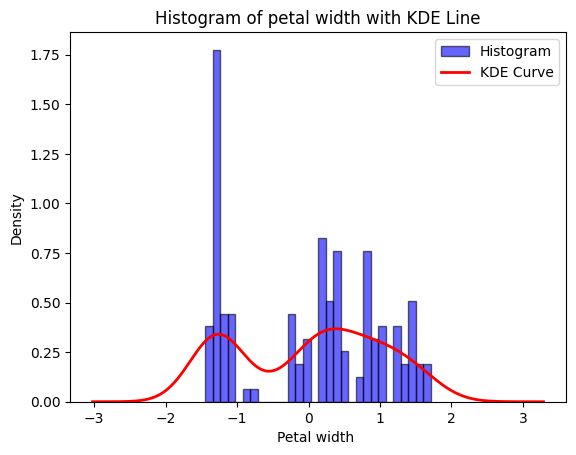

In [ ]:
# Plot the histogram
df_iris['petal_width'].hist(bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Histogram')

# Add a KDE curve using pandas
df_iris['petal_width'].plot(kind='kde', color='red', linewidth=2, label='KDE Curve')

# Add labels and legend
plt.title('Histogram of petal width with KDE Line')
plt.xlabel('Petal width ')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
skewness = df_iris['petal_width'].skew()
print("Skewness:", skewness)

Skewness: -0.10499656214412686


**Petal width Observations:**

The graph clearly indicates that petal lengths in the dataset are not normally distributed but instead follow a bimodal pattern, suggesting that the dataset contains two different subgroups of flowers(two cluserts), likely corresponding to different species.

The first peak is around 0-0.5 and the second peak is around 2–2.7, with a gap in between.

The skewness value of -0.105 for petal width indicates that the data is nearly symmetric with a very slight left skew(negative skew)

In [ ]:
# Scatterplot

colors  = ['red', 'orange', 'blue']
species = ['virginica', 'versicolor', 'setosa']

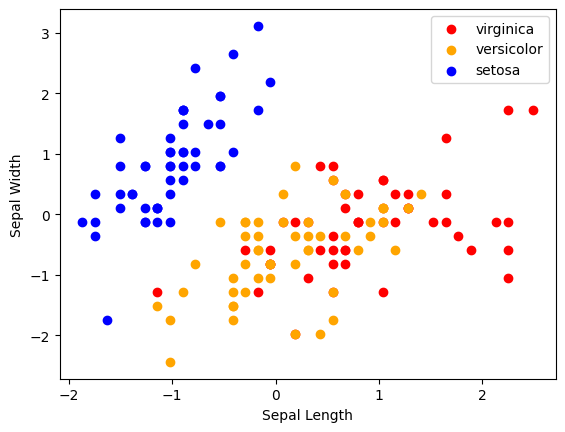

In [ ]:
for i in range(3):
  x = df_iris[df_iris['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

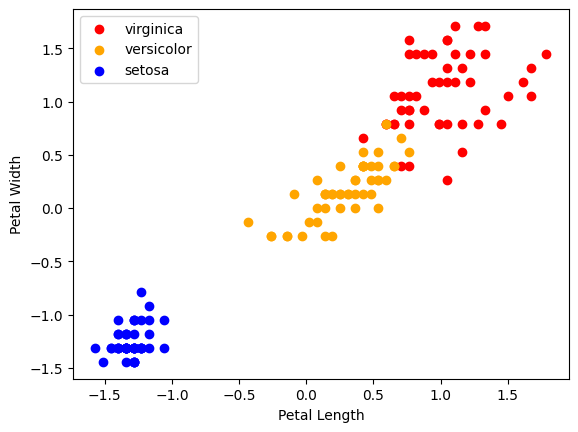

In [ ]:
for i in range(3):
  x = df_iris[df_iris['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

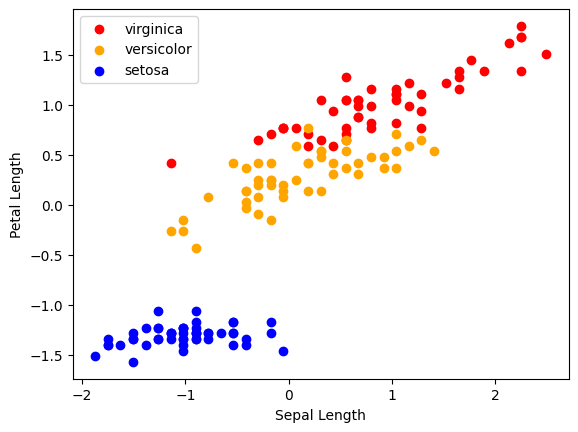

In [ ]:
for i in range(3):
  x = df_iris[df_iris['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

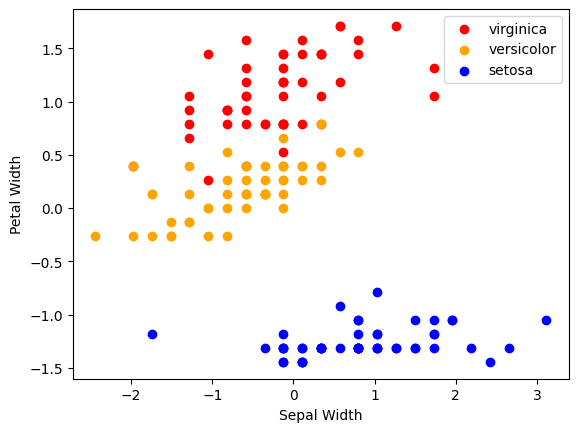

In [ ]:
for i in range(3):
  x = df_iris[df_iris['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label = species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [ ]:
# Calculate the correlation matrix only for numerical features
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
correlation_matrix = df_iris[numerical_features].corr()
correlation_matrix



,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


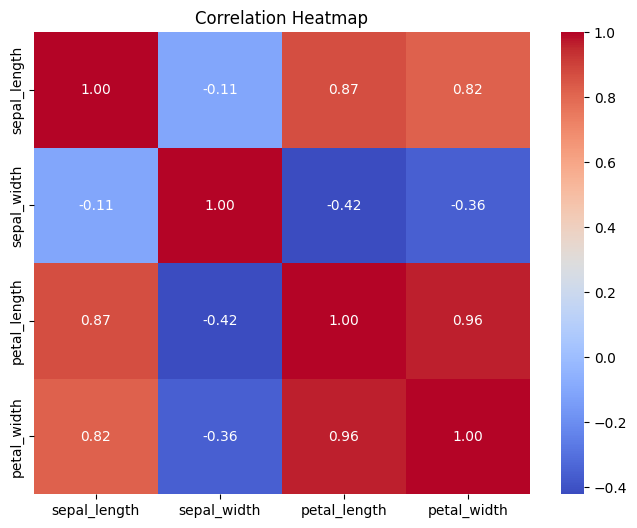

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Encoding the Categorical variables


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris['species'] = le.fit_transform(df_iris['species'])
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [ ]:
df_iris['species'] = le.fit_transform(df_iris['species'])
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [ ]:
df_iris['species'].value_counts()

,count
species,
0,50
1,50
2,50


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = df_iris.drop('species', axis=1)
y = df_iris['species']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Logistics Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
# model.fit(X_train, y_train)

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression()

# Performance of the metric




*   Accuracy
*   Precision
*   Recall
*   F1-score





In [ ]:
print("Accuracy:", lr_model.score(X_test, y_test))

Accuracy: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [ ]:
print("Accuracy:", dt_model.score(X_test, y_test))

Accuracy: 0.9555555555555556


In [ ]:
from sklearn.metrics import classification_report

# Get unique species names as strings
target_names = df_iris['species'].unique().astype(str).tolist()  # Convert to string type and then to list

# Generate the classification report
report = classification_report(X_test, y_, target_names=target_names)
print(report)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Using Cross validation

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score


dt_scores = cross_val_score(dt_model, X, y, cv=5)
lr_scores = cross_val_score(lr_model, X, y, cv=5)

print("Decision Tree Accuracy: ", dt_scores.mean())
print("Logistic Regression Accuracy: ", lr_scores.mean())


Decision Tree Accuracy:  0.9600000000000002
Logistic Regression Accuracy:  0.9600000000000002


# Observations

**Que1: Preprocess the Iris dataset. Handle missing values and normalize data where needed.**

In the Iris dataset, there are no missing values. Using LabelEncoder, the species column (categorical target variable) encoded into numeric labels: 0, 1, and 2, corresponding to the three species.
Normalize the Iris dataset using the MinMaxScaler library to scale the data values between a specified range, typically 0 and 1.






**Que2: Use both Decision Tree and Logistic Regression to classify the type of iris flower (Setosa, Versicolor, or Virginica) based on features like sepal length, sepal width, petal length, and petal width. Explain how each algorithm classifies the flowers into the three categories**.

***Logistic Regression Accuracy: 1.0 (100%)***

This means Logistic Regression has perfectly classified the training data into the three flower categories. Logistic Regression assumes a linear decision boundary. Since the Iris dataset is well-structured and partially linearly separable, Logistic Regression can achieve high accuracy.

***Decision Tree Accuracy: 0.95544 (95.5%)***

The Decision Tree classified slightly fewer instances correctly in the training phase. Decision Trees create non-linear decision boundaries by splitting features iteratively. They might overfit slightly on small datasets.

***After Applying Cross-Validation***

Cross-Validated Accuracy for Both: 0.966 (96.6%) Cross-validation evaluates the model's performance on multiple splits of the data, ensuring it generalizes well to unseen data. Both models have similar performance (96.6%) after cross-validation, indicating they are robust and perform well on this dataset.

**Que3: Train and test the models using appropriate metrics like accuracy, precision, recall, and F1-score.**

***Precision:***
For each class (0, 1, and 2), the model's precision is 1.00, meaning the model is correctly identifying all the positive instances for each class with no false positives.

***Recall:***
For each class (0, 1, and 2), the recall is also 1.00, meaning the model is correctly identifying all the actual instances of each class with no false negatives.

***F1-Score:***
The F1-score is 1.00 for all classes, which is the harmonic mean of precision and recall. Since both precision and recall are perfect, the F1-score is also perfect.
***Accuracy:***
The overall accuracy is 1.00 (100%), meaning all in the test set are correctly classified.

Since our dataset is small and the model achieved perfect results, we see high accuracy and F1 scores. However, in real-world scenarios with imbalanced data, accuracy may not be the best metric to rely on. In such cases, we should consider other evaluation metrics like precision, recall, or F1-score to get a more accurate measure of model performance.


**Que4: Provide a comparative analysis of the two algorithms in terms of their performance, and comment on the following.**

***Which algorithm had better accuracy or F1-score?***

Both algorithms (Decision Tree and Logistic Regression) performed equally well in terms of accuracy and F1-score on the Iris dataset, as you have achieved perfect scores for all metrics.
There is no clear winner in this case, as both algorithms yielded the same performance.

***Which model was faster or easier to train?***

**Logistic Regression:**
Faster and easier to train because it involves solving a convex optimization problem. The algorithm computes weights iteratively using techniques like gradient descent.
Training time is minimal, especially for small datasets like Iris.

**Decision Tree:**

Slightly slower because it involves splitting the dataset repeatedly based on feature thresholds, which requires evaluating multiple conditions for each split. For larger datasets or more features, the time complexity increases.

***How does normalization affect performance?***

Normalization significantly impacts Logistic Regression because it relies on gradient-based optimization. Features on vastly different scales can lead to poor convergence or suboptimal results.After normalization, Logistic Regression performs better and converges faster, ensuring a well-optimized model.

Normalization does not affect performance for Decision Trees. Trees split the data based on feature thresholds, and the relative scaling of features doesn’t matter.